In [1]:
import os
import csv
import numpy as np
import pandas

data_directory = "/Users/Yusi/Documents/EE232E/HW_4/finance_data/data"
os.chdir(data_directory)

close_data = {}
end_date_data = {}

for root,dirs,files in os.walk(data_directory):
    for file in files:
        if file.endswith(".csv"):
            with open(file) as f:
                #cf = csv.DictReader(f, fieldnames=["Close"])
                cf = csv.reader(f)
                stock_name = file[:-4]
                #cf.next()
                data = pandas.read_csv(file)
                close_data[stock_name] = data["Close"].values
                end_date_data[stock_name] = [data["Date"].values[0], data["Date"].values[-1]]

            f.close()
            

In [ ]:
# stock_names = close_data.keys();

# for i in range(len(stock_names)):
#     if end_date_data[stock_names[i]][0] != '2014-05-01':
#         print(stock_names[i])
# #     if end_date_data[stock_names[i]][1] != '2017-05-12':
# #         print(stock_names[i])
        

In [ ]:
# r_i = np.diff(np.log(close_data['A']))
# r_j = np.diff(np.log(close_data['AAL']))

# # p_ij_n = (np.dot(r_i,r_j)/len(r_i) - np.mean(r_i)*np.mean(r_j))
# # p_ij_d = np.sqrt(np.var(r_i) * np.var(r_j))
# #p_ij_d = (np.sqrt((np.mean(np.square(r_i))-np.square(np.mean(r_i)))*(np.mean(np.square(r_j))-np.square(np.mean(r_j))))

# p_ij = (np.dot(r_i,r_j)/len(r_i) - np.mean(r_i)*np.mean(r_j))/ (np.sqrt(np.var(r_i) * np.var(r_j)))
# print(p_ij)


In [2]:
network_directory = "/Users/Yusi/Documents/EE232E/HW_4/"
os.chdir(network_directory)
StockNetworkFile = "StockNetworkFile.txt"

f = open(StockNetworkFile, 'w')


stock_names = close_data.keys();
num_stocks = len(stock_names)

d_ij_hist = np.zeros(int(num_stocks*(num_stocks-1)/2.0), dtype=np.float)

ind = 0

for i in range(num_stocks):
    # Loop over all Movies from actor_i
    stock_i = stock_names[i]
    for j in range(i+1,num_stocks):
        
        stock_j = stock_names[j]
        
        r_i = np.diff(np.log(close_data[stock_i]))
        r_j = np.diff(np.log(close_data[stock_j]))
        
        if len(r_i) != len(r_j):
            min_len = min(len(r_i),len(r_j))     # calculate the minimum length of r_i and r_k

            r_i = r_i[-min_len:] # since all stocks end at the same date, delete non-corresponding time values from the longer data set
            r_j = r_j[-min_len:]

#         print(len(r_i))
#         print(len(r_j))
#         print(stock_j)
        p_ij = (np.dot(r_i,r_j)/len(r_i) - np.mean(r_i)*np.mean(r_j))/ (np.sqrt(np.var(r_i) * np.var(r_j)))
        
        d_ij = np.sqrt(2*(1-p_ij))
        d_ij_hist[ind] = d_ij
        
        ind = ind+1
        
        f.write(stock_i+"\t"+stock_j+"\t"+("%.15f" % d_ij)+"\n")

f.close()


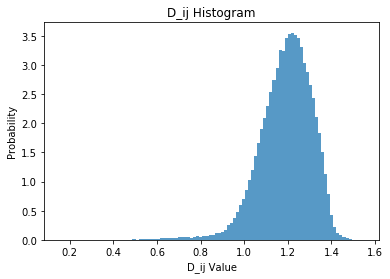

In [3]:
import matplotlib.pyplot as plt

# the histogram of the data
n, bins, patches = plt.hist(d_ij_hist, 100, normed=1, alpha = 0.75)

plt.xlabel('D_ij Value')
plt.ylabel('Probability')
plt.title('D_ij Histogram')

plt.show()

In [ ]:
for i in 
d_ij_hist